# Statistical Learning 

## Types of Statistics

1. Descriptive
2. Inferential 

Two main statistical methods are used in **data analysis**: **descriptive statistics**, which summarize data from a sample using indexes such as the mean or standard deviation, and **inferential statistics**, which draw conclusions from data that are subject to random variation (e.g., observational errors, sampling variation).


Descriptive statistics are most often concerned with two sets of properties of a distribution (sample or population): central tendency (or location) seeks to characterize the distribution's central or typical value, while dispersion (or variability) characterizes the extent to which members of the distribution depart from its center and each other. 


Inferences on mathematical statistics are made under the framework of probability theory, which deals with the analysis of random phenomena.



- Population 
- Sample, 
- mean, 
- median
- mode
- Central limit theorem
- 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Population

In [2]:
data = np.random.rand(1000)

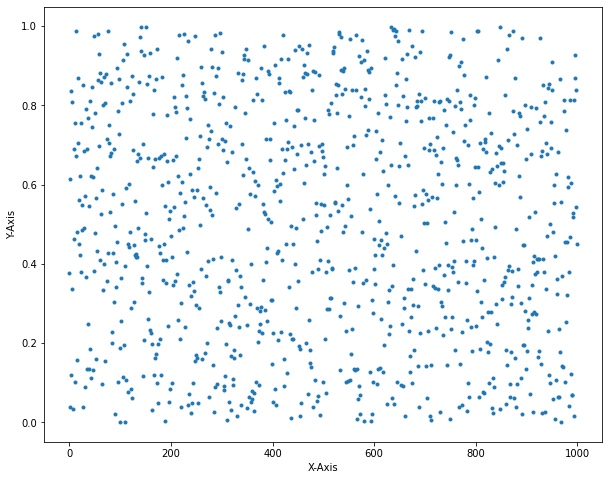

In [3]:
plt.figure(figsize=(10,8))
plt.plot(data, '.')
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')

plt.show()

### Permutation  

- Shuffling

### Sampling

- In statistics, quality assurance, and survey methodology, sampling is the selection of a subset (a statistical sample) of individuals from within a statistical population to estimate characteristics of the whole population. Statisticians attempt for the samples to represent the population in question. Two advantages of sampling are lower cost and faster data collection than measuring the entire population.

In [4]:
permutation = np.random.permutation(data)
permutation.shape

sample = permutation[:500]

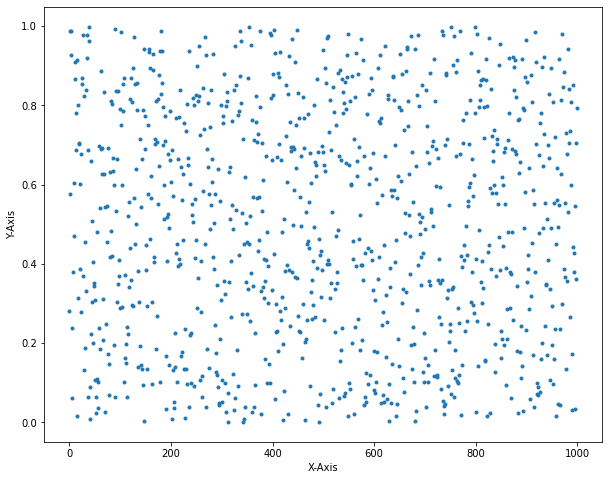

In [5]:
plt.figure(figsize=(10,8))
plt.plot(permutation, '.')
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')

plt.show()

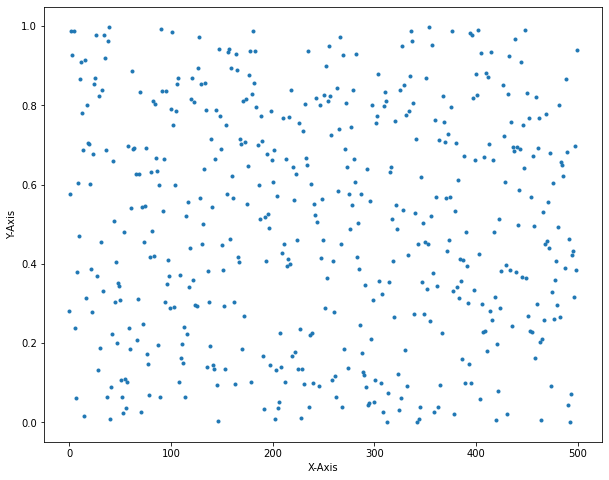

In [6]:
plt.figure(figsize=(10,8))
plt.plot(sample, '.')
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')

plt.show()

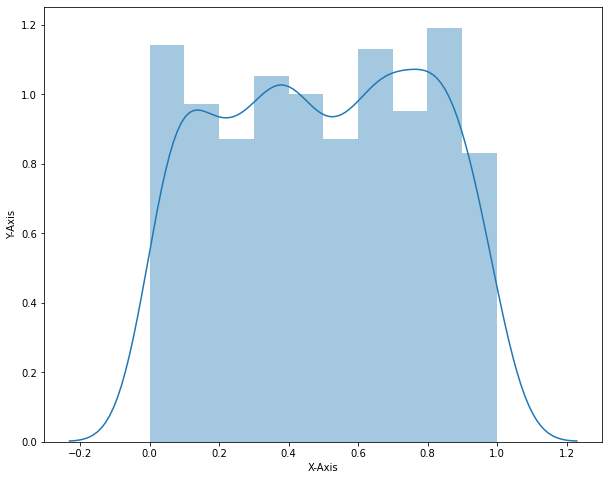

In [7]:
plt.figure(figsize=(10,8))
sns.distplot(permutation)
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')

plt.show()

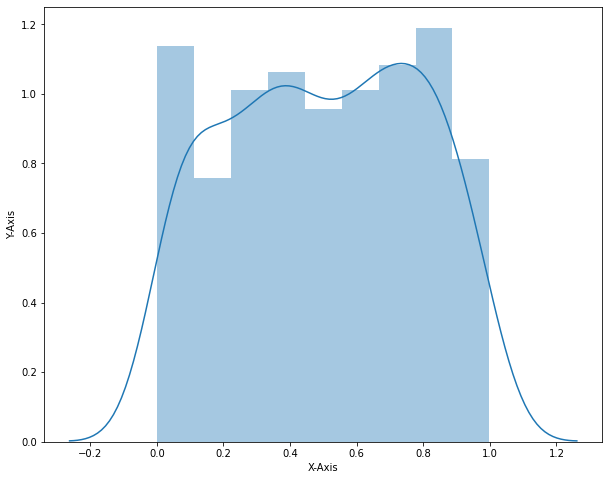

In [8]:
plt.figure(figsize=(10,8))
sns.distplot(sample)
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')

plt.show()

# Mean

Mean or average, is the central value of a discrete set of numbers: specifically, the sum of the values divided by the number of values.

$\mu = \frac{x_i}{n} $

where $x_i$ represents each element in an array

$n$ is the total number of element

## Median

Median is the middle value in a sorted acensending or descesnding, list of numbers.

$x = [1, 2, 3, 4, 5] $

$median(x)=3$ in an odd setting


If $x = [1, 2, 3, 4, 5, 6] $ then we take the mean of the middle two values.

$median(x)= \frac{3+4}{2}$ in an even setting

In [9]:
x = [1,2,2,3,3,4,7,100]

if len(x)%2 == 0:
    median1 = x[len(x)//2 - 1]
    median2 = x[len(x)//2]
    
    median = (median1+median2)/2
    print(median)
else:
    median = x[len(x)//2]
    print(median)
    

3.0


## Mode

Mode is the number that occurs most often in an array

In [10]:
def mode(values: list) -> int:
    
    counters = {}
    result = None
    m = []
    
    for value in values:
        if value in counters:
            counters[value] +=1
        else: 
            counters[value] = 1
            
        if (result is None) or (counters[value]>counters[result]):
            result = value
        elif (counters[value] == counters[result]) and (value>result):
            result = value
            
            m.append(result)
            values.remove(result)
            continue
    return m

In [11]:
x = [1,2,3,2,9,9,10,10,10,9]

In [12]:
mode(x)

[2, 9, 10]

## Central Limit Theorem

The distribution of the sample mean for a given **independent sample** will get closer to the normal distribution if the size of the sample gets bigger and bigger. Even if the population isn't normal itself.


In [28]:
data = np.random.randint(25,50, 70000)

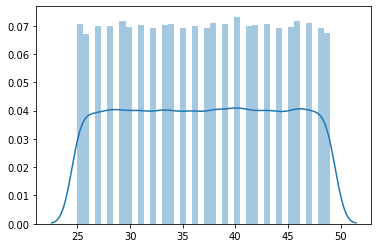

In [29]:
sns.distplot(data)

In [30]:
sample = {}
for i in range(70):    
    sample[i] = np.random.choice(data, 1000).mean()

37.00307142857143


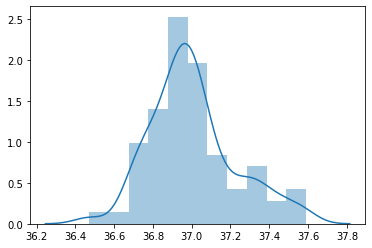

In [31]:
values = np.array(list(sample.values()))


sns.distplot(values)
print(values.mean())

In [17]:
def toss(n,m):
    '''
    toss n coins simultaneously. Compute the sum.
    Repeat m times
    '''
    s = np.random.random_integers(0,1,(n,m))
    return np.sum(s,axis=0)

def main(sample, permutation):
    
    n = sample
    m = permutation
    sums = toss(n,m)

#   compute the histogram
    h = np.histogram(sums, bins=range(0,n+2))
    val =h[1][:-1] # removes the last point

#   theoretical results: Gaussian distribution
    miu = n*0.5 # theoretical mean
    sigma = np.sqrt(n*0.5*0.5) # theoretical standard deviation
    x = np.linspace(0,n,5000)
    y = 1.0/(sigma*np.sqrt(2*np.pi))*np.exp(-1.0*(x-miu)**2/(2.0*sigma**2))

#   plot the results
    plt.figure(figsize=(10, 8))
    bar1 = plt.bar(val,h[0]/(m*1.0))
    plt.xlim(miu-3*sigma,miu+3*sigma)
    xpos = [miu-3*sigma,miu-2*sigma,miu-sigma,miu,miu+sigma,miu+2*sigma,miu+3*sigma]
    plt.xticks(xpos,[r'$\mu-3\sigma$',r'$\mu-2\sigma$',r'$\mu-\sigma$',r'$\mu$',r'$\mu+\sigma$',r'$\mu+2\sigma$',r'$\mu+3\sigma$'])
    plt.title(r'Calculated average = %.2f, $\mu$ = %.2f, Calculated stdev = %.2f, $\sigma$ = %.2f' %(np.average(sums),miu,np.std(sums),sigma),{'fontsize':14})
    plt.xlabel('Sums',{'fontsize':14})
    plt.ylabel('Probability',{'fontsize':14})
    plt.tick_params(axis='both',labelsize=14)
    line1, = plt.plot(x,y,'r--',linewidth=3.0)
    plt.legend([line1,bar1],['Theory','Simulation'],fontsize=14)
    plt.show()


In [18]:
from ipywidgets import interactive
import warnings

warnings.filterwarnings('ignore')

In [19]:
interactive_plot = interactive(main, sample=(1,1000), permutation=(1, 10000))

output = interactive_plot.children[0]
interactive_plot

interactive(children=(IntSlider(value=500, description='sample', max=1000, min=1), IntSlider(value=5000, descr…

**Conclusion**

We can conclude that the larger the sample size the closer it is to the **normal distribution**. 

**Example**

1. What is the good month to launch a particular product?
2. What should be the weight of a particular product before shipping?
3. What should be population of the crowd for a particular event with this food in the menu, such that we event is house full?


## Normal Distribution

The distribution is type of population distribution where the mean, median and mode reflects the same value. 

$f(x)=\frac{1}{\sigma\sqrt{2\pi}}e^{\frac{-1}{2}{(\frac{x-\mu}{\sigma})}^2}$

Where the parameters $\mu$ and $\sigma > 0$ are real number

Normal distributions are important in statistics and are often used in the natural and social sciences to represent real-valued random variables whose distributions are not known

Their importance is partly due to the central limit theorem. It states that, under some conditions, the average of many samples (observations) of a random variable with finite mean and variance is itself a random variable whose distribution **converges** to a normal distribution as the number of samples increases. Therefore, physical quantities that are expected to be the sum of many independent processes (such as measurement errors) often have distributions that are nearly normal.

In [53]:
np.random.seed(34)
population = np.random.randn(1000)

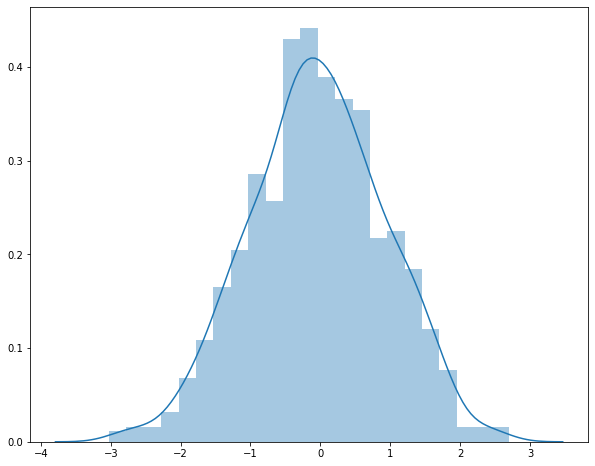

In [54]:
plt.figure(figsize=(10, 8))
sns.distplot(population)

In [55]:
#sample
sample = np.random.choice(population, 40)


The Sample mean is: -0.044140841038260714

The Population mean is: -0.040695355453232426


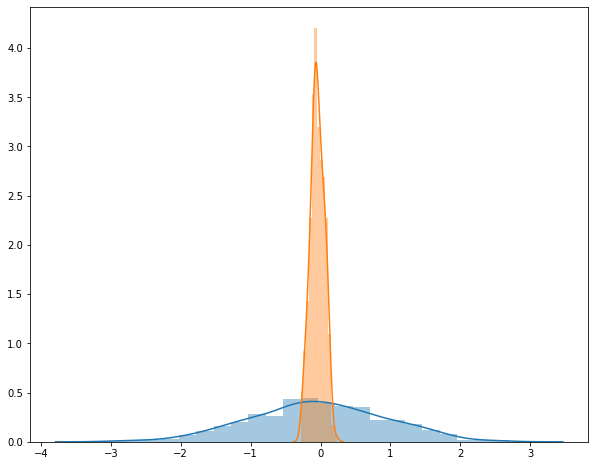

In [57]:
sample = {}
for i in range(300):
    sample[i] = np.random.choice(population, 100).mean()
plt.figure(figsize=(10, 8))
sns.distplot(population, label='Population')
sns.distplot(list(sample.values()), label='Sample')

print()
print('The Sample mean is:',np.array(list(sample.values())).mean())
print()
print('The Population mean is:',population.mean())

### Standard Deviation

The standard deviation is a measure of the amount of **variation** or dispersion of a set of values. A low standard deviation indicates that the values tend to be close to the mean of the set, while a high standard deviation indicates that the values are spread out over a wider range

In [84]:
np.random.seed(55)
x = np.random.randn(5000)
x = x + 0.2*np.random.randn(5000)

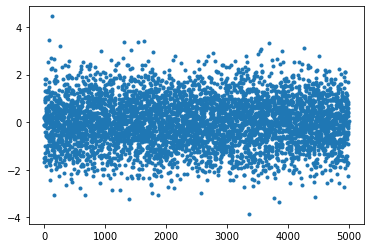

In [85]:
plt.plot(x, '.')

The Standard Deviation is 1.0192074749833762,
the mean is 0.012405247904148133,
and the variance is 1.0387838770619895


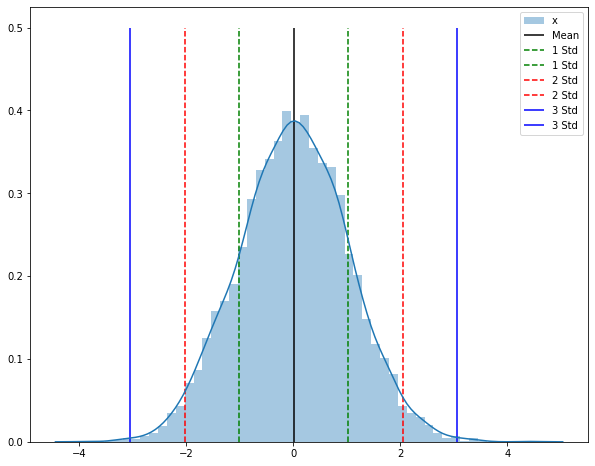

In [93]:
plt.figure(figsize=(10, 8))
sns.distplot(x, label='x')


plt.vlines(x.mean(), 0, 0.5, label='Mean')
plt.vlines(x.mean() + x.std(), 0, 0.5, label='1 Std', linestyles='--', colors='g')
plt.vlines(x.mean() - x.std(), 0, 0.5, label='1 Std', linestyles='--', colors='g')


plt.vlines(x.mean() + 2*x.std(), 0, 0.5, label='2 Std', linestyles='--', colors='r')
plt.vlines(x.mean() - 2*x.std(), 0, 0.5, label='2 Std', linestyles='--', colors='r')

plt.vlines(x.mean() + 3*x.std(), 0, 0.5, label='3 Std', linestyles='-', colors='b')
plt.vlines(x.mean() - 3*x.std(), 0, 0.5, label='3 Std', linestyles='-', colors='b')

plt.legend()
print(f'The Standard Deviation is {x.std()},\nthe mean is {x.mean()},\nand the variance is {x.var()}')